In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# use 'yr_built' to calculate age of building
from datetime import datetime as dt
df['age'] = 2024 - df['yr_built']   # try using datetime instead of raw number

# drop 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'id', 'date'
df = df.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'id', 'date'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

'''I could attempt to explore the yr_renovated as a score in future since it sorts of discounts the age factor.
Date of the transaction will have some effect as well as more recent transactions should be logically more expensive'''

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


'''I think there is a slight problem with the data as there are houses without bedrooms
and a less serious ones are those without a bathroom. I would not drop them due to insufficient 
information and/or knowledge about the data.
No missing values'''

## Data Visualisation

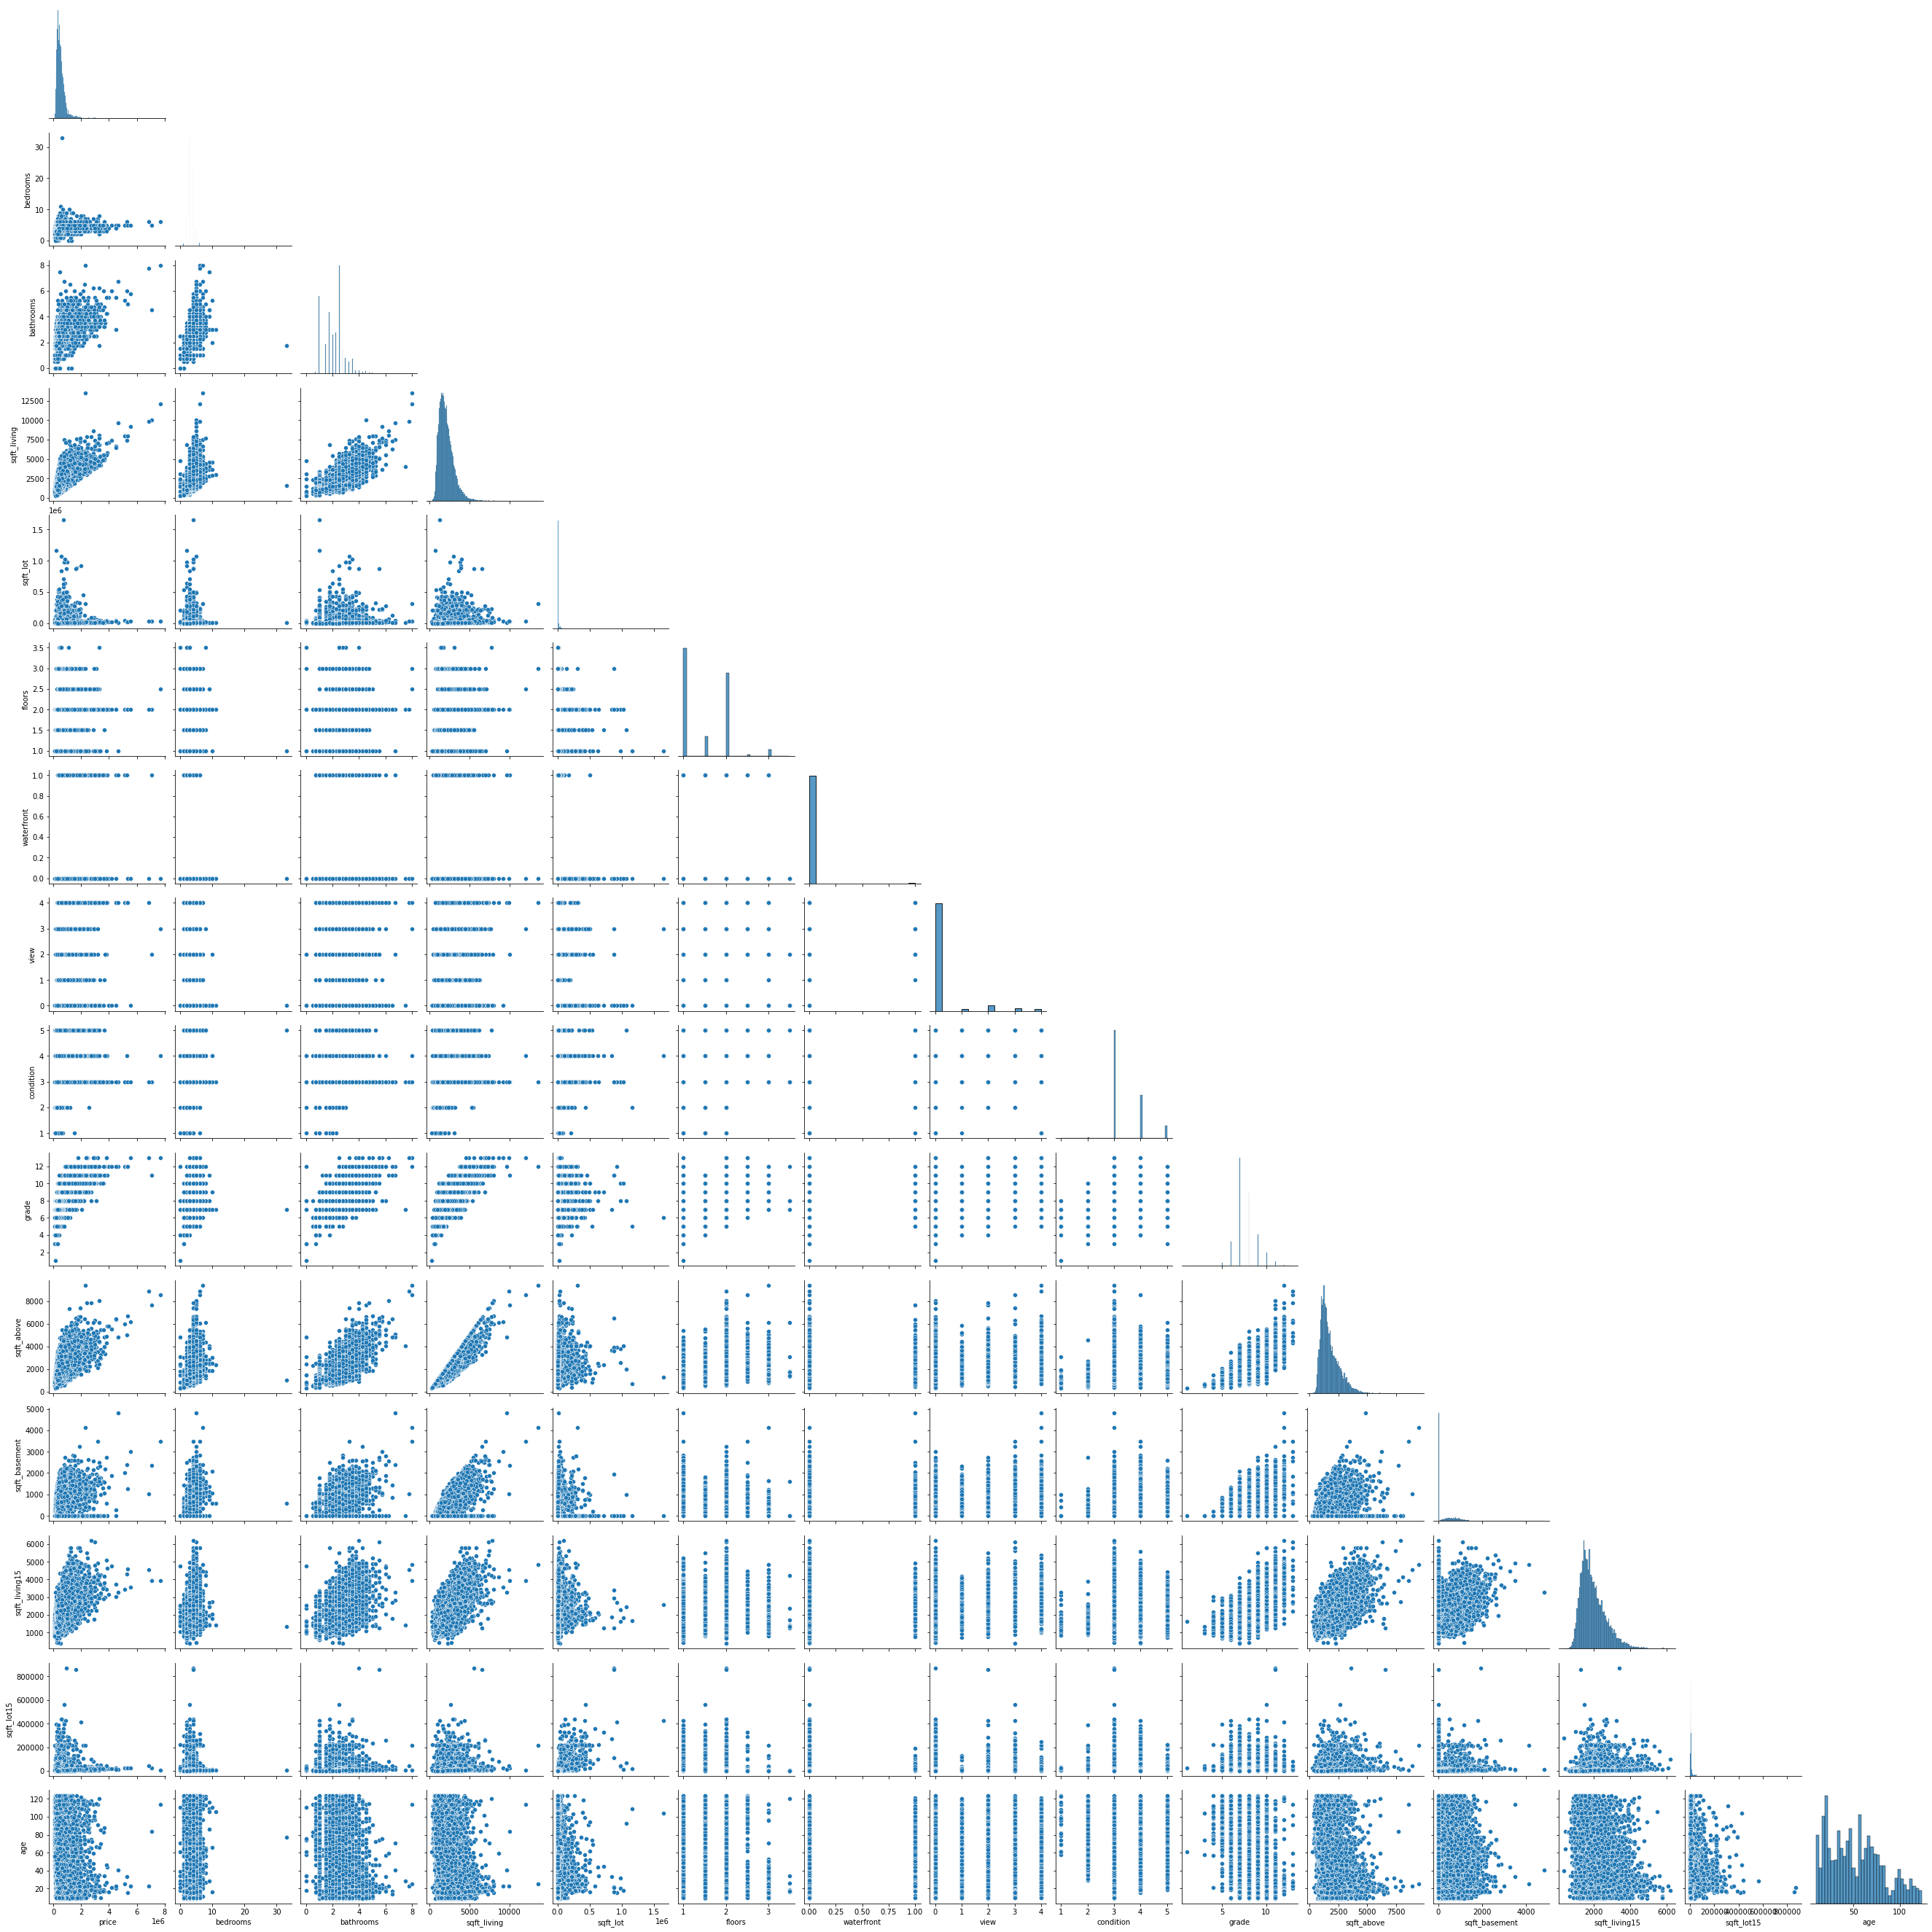

In [8]:
sns.pairplot(data=df, corner=True)

In [9]:
correlation = df.corr()
correlation['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
sqft_living15    0.585379
sqft_lot15       0.082447
age             -0.054012
Name: price, dtype: float64

'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15' are the dominant predictors, while 'age' is the only negative

## Data preparation

In [10]:
# separate data into dependent and independent variables
X = df.drop('price', axis=1)
y = df['price']

In [11]:
# split data into train, test and cross validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # train and test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=42) # train and test

## Model

In [13]:
from sklearn.linear_model import LinearRegression

In [25]:
# initialize and train model
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [26]:
# predict using model
y_pred = model.predict(X_test)

In [28]:
# check accuracy of predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mae

139734.76459999854

In [17]:
df['price'].mean()

540088.1417665294

In [18]:
model.score(X_test, y_test)

0.6477970253133624